# Árvore de Decisão

- ### Vantagens:
    - Fácil Interpretação
    - Não precisa de Normalização ou Padronização dos Dados
    - Rápido para classificar novos registros

- ### Desvantagens:
    - Geração de árvores muito complexas (com isso pode ocorrer overfitting)
    - Pequenas mudanças nos dados podem mudar a árvore (uma solução para ajudar a evitar isso é a poda)
    - Problema NP-Completo para construir a árvore

- ### Upgrades como o Random Forest melhoram o desempenho do algoritmo
    - Usado no Kinect da Microsoft
    
- ### CART - Classification and Regression Trees

# Aplicando o algoritmo:


In [1]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
import pickle
with open('risco_credito.pkl', mode = 'rb')as f:
    x_df, y_df = pickle.load(f)

In [4]:
x_df, y_df

(array([[2, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 0, 2],
        [2, 1, 1, 0],
        [2, 1, 0, 2],
        [0, 1, 1, 2],
        [0, 0, 0, 2],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 2],
        [2, 0, 1, 1]], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [5]:
arvore = DecisionTreeClassifier(criterion='entropy')
arvore.fit(x_df, y_df)

DecisionTreeClassifier(criterion='entropy')

In [6]:
arvore.feature_importances_

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

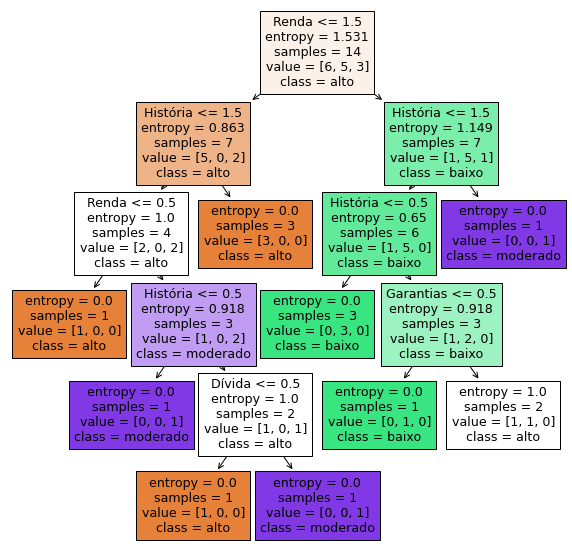

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt
previsores = ['História', 'Dívida', 'Garantias', 'Renda']
figura, eixos = plt.subplots(nrows=1,ncols=1, figsize=(10,10))
tree.plot_tree(arvore, feature_names = previsores, class_names = arvore.classes_, filled=True);

In [14]:
#historia boa (0), divida alta (0), garantias nenhuma (1), renda > 35 (2) -> [0,0,1,2]
#historia ruim (2), divida alta (0), garantias adequada (0), renda <15 (0) -> [2,0,0,0]

previsor = arvore.predict([[0,0,1,2], [2,0,0,0]])
previsor

array(['baixo', 'alto'], dtype=object)

# Base de dados - Credit_Data

In [15]:
with open('credit.pkl', mode = 'rb') as f:
    x_df_train, y_df_train, x_df_test, y_df_test = pickle.load(f)

In [18]:
x_df_train.shape, y_df_train.shape

((1500, 3), (1500,))

In [29]:
arvore = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore.fit(x_df_train, y_df_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
previsor = arvore.predict(x_df_test)
previsor

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
accuracy_score(y_df_test, previsor)

0.982

In [33]:
confusion_matrix(y_df_test, previsor)

array([[430,   6],
       [  3,  61]], dtype=int64)

In [34]:
print(classification_report(y_df_test, previsor))

#Identifica corretamente pessoas que pagam com 99% de acurácia e quando identifica alguem que paga sestá correto em 99% dos casos

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



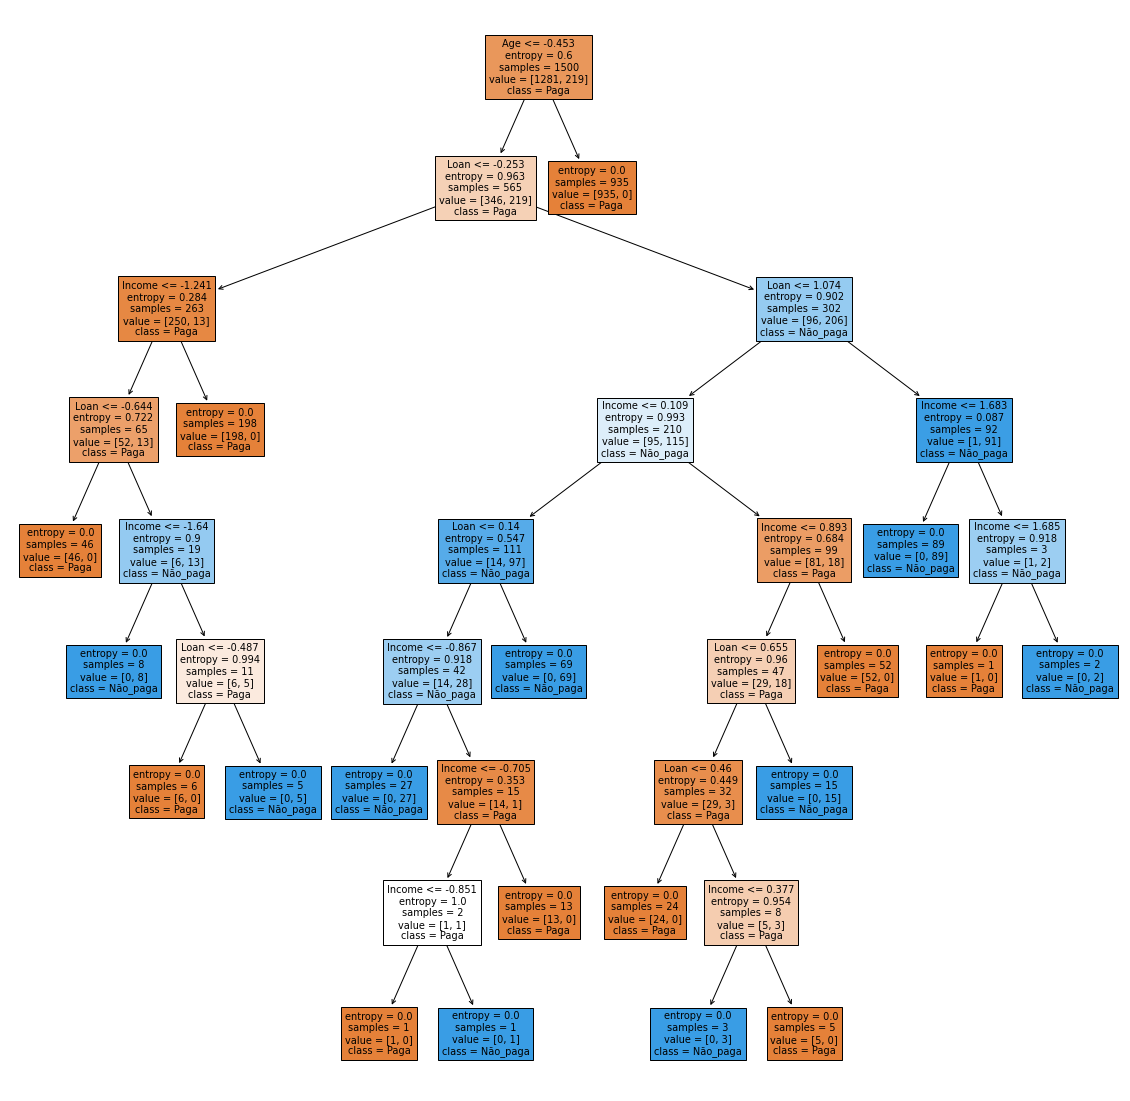

In [42]:
from sklearn import tree
import matplotlib.pyplot as plt
previsores = ['Income', 'Age', 'Loan']
figura, eixos = plt.subplots(nrows=1,ncols=1, figsize=(20,20))
tree.plot_tree(arvore, feature_names = previsores, class_names = ['Paga','Não_paga'], filled=True);
# fig.savefig('arvore_credit.png')

# Base de dados - Census

In [43]:
import pickle
with open('census.pkl', mode = 'rb') as f:
    x_df_train, y_df_train, x_df_test, y_df_test = pickle.load(f)

In [44]:
x_df_train.shape, y_df_train.shape

((27676, 108), (27676,))

In [46]:
x_df_test.shape, y_df_test.shape

((4885, 108), (4885,))

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
arvore = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore.fit(x_df_train, y_df_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
previsor = arvore.predict(x_df_test)
previsor

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
accuracy_score(y_df_test, previsor)

0.8104401228249745

In [54]:
confusion_matrix(y_df_test, previsor)

array([[3227,  466],
       [ 460,  732]], dtype=int64)

In [56]:
print(classification_report(y_df_test, previsor))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



In [63]:
arvore.classes_

array([' <=50K', ' >50K'], dtype=object)

# Random forest

- **Ensemble learning** (aprendizagem em conjunto)
    - "consultar diversos profissionais para tomar uma decisão/ diversas árvores em conjunto"
    - Vários algoritmos juntos para construirum algoritmo mais "forte"
    - Usa a média (regressão) ou votos da maioria (classificação) para dar a resposta a final
- **Random** -> Escolhe de forma aleatória **k** atributos para comparação da métrica de pureza/impureza (impureza de gini/entropia)
- **Forest** -> Conjunto de árvores

# Base Credit Data

In [66]:
with open('credit.pkl', mode = 'rb') as f:
    x_df_train, y_df_train, x_df_test, y_df_test = pickle.load(f)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
arvore = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
arvore.fit(x_df_train, y_df_train)

#n_estimators = 40 tem o melhor desempenho ate mesmo do que n maiores como n =100

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [73]:
previsor = arvore.predict(x_df_test)
previsor

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
accuracy_score(y_df_test, previsor)

0.984

In [75]:
confusion_matrix(y_df_test, previsor)

array([[433,   3],
       [  5,  59]], dtype=int64)

In [76]:
print(classification_report(y_df_test, previsor))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



# Base Census

In [77]:
with open('census.pkl', mode = 'rb') as f:
    x_df_train, y_df_train, x_df_test, y_df_test = pickle.load(f)
    

In [78]:
x_df_train.shape

(27676, 108)

In [84]:
from sklearn.ensemble import RandomForestClassifier
arvore = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
arvore.fit(x_df_train, y_df_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [85]:
previsor = arvore.predict(x_df_test)
previsor

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [86]:
accuracy_score(y_df_test, previsor)

0.8507676560900717

In [87]:
confusion_matrix(y_df_test, previsor)

array([[3420,  273],
       [ 456,  736]], dtype=int64)

In [88]:
print(classification_report(y_df_test, previsor))

# ainda tem dificuldade para identificar pessoas que ganham mais de 50k, consegue identificar 62% dessas pessoas e quando faz 
# essa identificação a precisão é de 73%

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

